in [`gmx editconf`](https://manual.gromacs.org/current/onlinehelp/gmx-editconf.html) command<br>
`-d` arg determined the Distance between the solute and the box<br>
we want fix the system atom number by adjust the `-d` value<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
pdbid = "143d"

In [3]:
def get_n_sol(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top > /dev/null 2>&1
    sol = !grep "SOL" topol.top
    n_sol = int(sol[0].split()[1])
    return n_sol

In [4]:
def get_box(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron >editconf.txt 2>&1
    volume = !grep "new box volume" editconf.txt
    volume = float(volume[0].split()[4])
    return volume

In [5]:
def get_n_atoms(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top >solvate.txt 2>&1
    atoms = !grep "Solvent box contains" solvate.txt
    n_atoms = int(atoms[0].split()[3])
    return n_atoms

### Plot d v.s. Volume (linear)

In [ ]:
!rm \#topol.top* \#{pdbid}*
d2volume = {}
for d in tqdm(np.linspace(0.720, 0.740, 51)):
    volume = get_box(d)
    d2volume[np.round(d, decimals=15)] = volume

In [ ]:
plt.plot(d2volume.keys(), d2volume.values())
plt.scatter(d2volume.keys(), d2volume.values())
plt.xlabel('d')
plt.ylabel('volume')

### Plot d v.s. n_sol (non-linear)
in wtTel22, we want fix n_sol = **3854**

In [9]:
!rm \#topol.top* \#{pdbid}*
d2n_sol = {}
for d in tqdm(np.linspace(1.12, 1.15, 51)):
    n_sol = get_n_sol(d)
    d2n_sol[np.round(d, decimals=15)] = n_sol

100%|██████████| 51/51 [00:43<00:00,  1.17it/s]


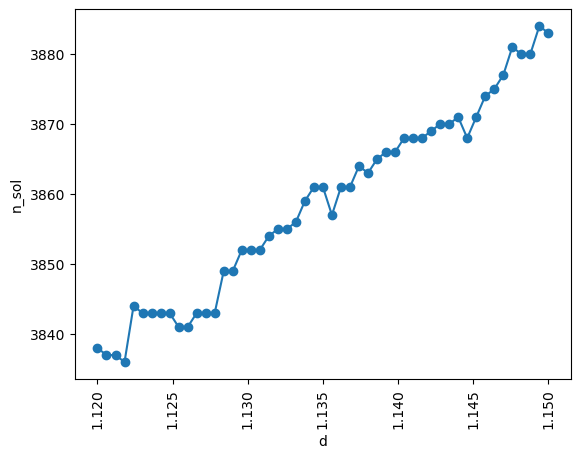

In [10]:
plt.plot(d2n_sol.keys(), d2n_sol.values())
plt.scatter(d2n_sol.keys(), d2n_sol.values())
plt.xlabel('d')
plt.ylabel('n_sol')
plt.xticks(rotation=90)
plt.show()

In [12]:
d2n_sol

{1.12: 3838,
 1.1206: 3837,
 1.1212: 3837,
 1.1218: 3836,
 1.1224: 3844,
 1.123: 3843,
 1.1236: 3843,
 1.1242: 3843,
 1.1248: 3843,
 1.1254: 3841,
 1.126: 3841,
 1.1266: 3843,
 1.1272: 3843,
 1.1278: 3843,
 1.1284: 3849,
 1.129: 3849,
 1.1296: 3852,
 1.1302: 3852,
 1.1308: 3852,
 1.1314: 3854,
 1.132: 3855,
 1.1326: 3855,
 1.1332: 3856,
 1.1338: 3859,
 1.1344: 3861,
 1.135: 3861,
 1.1356: 3857,
 1.1362: 3861,
 1.1368: 3861,
 1.1374: 3864,
 1.138: 3863,
 1.1386: 3865,
 1.1392: 3866,
 1.1398: 3866,
 1.1404: 3868,
 1.141: 3868,
 1.1416: 3868,
 1.1422: 3869,
 1.1428: 3870,
 1.1434: 3870,
 1.144: 3871,
 1.1446: 3868,
 1.1452: 3871,
 1.1458: 3874,
 1.1464: 3875,
 1.147: 3877,
 1.1476: 3881,
 1.1482: 3880,
 1.1488: 3880,
 1.1494: 3884,
 1.15: 3883}